In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 6CA3-2EE7

 Directory of C:\Users\gokul\OneDrive\Documents\excelr\project\data

13-04-2022  10:03 PM    <DIR>          .
13-04-2022  10:03 PM    <DIR>          ..
12-04-2022  02:06 PM    <DIR>          .ipynb_checkpoints
11-04-2022  07:29 PM            14,987 deployment.ipynb
16-03-2022  09:48 PM            14,850 Ecommerce project.docx
13-04-2022  01:40 PM         1,335,903 ecommerce updated.pptx
16-03-2022  09:48 PM            40,116 Ecommerce.csv
03-04-2022  09:27 PM           861,685 ecommerce.pptx
07-04-2022  12:57 PM         1,195,159 log transformation.ipynb
13-04-2022  01:29 PM            55,901 outlier tratment.ipynb
11-04-2022  06:58 PM         2,333,140 project.ipynb
07-04-2022  02:00 PM         1,063,114 reciprocal transformation.ipynb
03-04-2022  09:02 PM    <DIR>          scs
13-04-2022  10:03 PM         1,228,605 sqrt transformation.ipynb
              10 File(s)      8,143,460 bytes
               4 Dir(s)  125,245,308

In [4]:
data=pd.read_csv("Ecommerce.csv")

In [5]:
data.head()

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,1,32.538350,12.028846,35.850540,3.648854,576.098273
1,2,34.206718,12.226851,37.246443,1.987536,460.784955
2,3,31.535240,11.814341,36.610697,3.351191,349.739791
3,4,32.199577,11.295163,37.425695,5.234337,547.709921
4,5,33.570137,13.500972,36.856165,3.938603,487.055641


In [6]:
data_cleaned=data.drop("Customer ID",axis=1)

In [7]:
data_cleaned.head()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,32.538350,12.028846,35.850540,3.648854,576.098273
1,34.206718,12.226851,37.246443,1.987536,460.784955
2,31.535240,11.814341,36.610697,3.351191,349.739791
3,32.199577,11.295163,37.425695,5.234337,547.709921
4,33.570137,13.500972,36.856165,3.938603,487.055641


In [8]:
data_cleaned.describe()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
count,623.000000,623.000000,623.000000,623.000000,623.000000
mean,33.039429,12.001459,37.079018,3.514850,499.600023
std,0.949071,0.996609,0.991753,0.948063,80.032965
min,29.972300,9.273248,33.751071,0.891398,256.670000
25%,32.375680,11.334163,36.376725,2.906558,447.665160
50%,33.044399,11.998823,37.113631,3.504771,498.806136
75%,33.700947,12.647695,37.773880,4.140305,551.257208
max,35.744415,15.138317,40.808388,6.553916,775.337626


# reciprocal transformation of data

In [9]:
datanew=np.reciprocal(data_cleaned)

In [10]:
datanew.head()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,0.030733,0.083133,0.027894,0.274059,0.001736
1,0.029234,0.081787,0.026848,0.503135,0.002170
2,0.031711,0.084643,0.027314,0.298401,0.002859
3,0.031056,0.088533,0.026720,0.191046,0.001826
4,0.029788,0.074069,0.027133,0.253897,0.002053


In [11]:
datanew.describe()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
count,623.000000,623.000000,623.000000,623.000000,623.000000
mean,0.030292,0.083901,0.026989,0.310915,0.002056
std,0.000873,0.007022,0.000724,0.110365,0.000351
min,0.027976,0.066058,0.024505,0.152581,0.001290
25%,0.029673,0.079066,0.026473,0.241528,0.001814
50%,0.030262,0.083342,0.026944,0.285325,0.002005
75%,0.030887,0.088229,0.027490,0.344050,0.002234
max,0.033364,0.107837,0.029629,1.121833,0.003896


# model buliding

# svm

In [12]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
x=datanew.iloc[:,:-1]
y=datanew.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [14]:
modelsvm= SVR()
modelsvm.fit(x_train,y_train)

SVR()

In [15]:
predt=modelsvm.predict(x_test)

In [16]:
metrics.mean_absolute_percentage_error(predt,y_test)

0.18859054434244799

In [17]:
metrics.mean_absolute_error(predt,y_test)

0.0004674763404853597

## decision tree

In [18]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [19]:
x=datanew.iloc[:,:-1]
y=datanew.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [20]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [21]:
pred=model.predict(x_test)

In [22]:
metrics.mean_absolute_percentage_error(y_test,pred)

0.20820159133515032

In [23]:
metrics.mean_absolute_error(y_test,pred)

0.0004379192017737316

## random forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [25]:
x=datanew.iloc[:,:-1]
y=datanew.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [26]:
model2=RandomForestRegressor()
model2.fit(x_train,y_train)

RandomForestRegressor()

In [27]:
y_pred=model2.predict(x_test)

In [28]:
metrics.mean_absolute_percentage_error(y_test,y_pred)

0.14802078624156023

In [29]:
metrics.mean_absolute_error(y_pred,y_test)

0.00031890143564949533

## bagging regression

In [30]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [31]:
x=datanew.iloc[:,:-1]
y=datanew.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [32]:
model4=BaggingRegressor()
model4.fit(x_train,y_train)

BaggingRegressor()

In [33]:
ypredict=model4.predict(x_test)

In [34]:
metrics.mean_absolute_percentage_error(y_test,ypredict)

0.15127043531546586

In [35]:
metrics.mean_absolute_error(ypredict,y_test)

0.00032472140866265546

### linear regression

In [36]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [37]:
x=datanew.iloc[:,:-1]
y=datanew.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [38]:
modelLR=LinearRegression()
modelLR.fit(x_train,y_train)

LinearRegression()

In [39]:
pred=modelLR.predict(x_test)

In [40]:
metrics.mean_absolute_error(pred,y_test)

0.00028709852678653953

In [41]:
metrics.mean_absolute_percentage_error(pred,y_test)

0.1405833045479855

# lasso ridge and elasticnet regression

In [42]:
from sklearn.linear_model import  Ridge
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet 

### ridge

In [43]:
x=datanew.iloc[:,:-1]
y=datanew.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [44]:
modelridge=Ridge()
modelridge.fit(x_train,y_train)

Ridge()

In [45]:
predict=modelridge.predict(x_test)

In [46]:
metrics.mean_absolute_percentage_error(predict,y_test)

0.13875221095491178

In [47]:
metrics.mean_absolute_error(predict,y_test)

0.00028375749816296844

### lasso

In [59]:
modellasso = Lasso() 
modellasso.fit(x_train, y_train) 
y_predict= modellasso.predict(x_test) 

In [60]:
metrics.mean_absolute_error(y_predict,y_test)

0.0002838670506733705

In [61]:
metrics.mean_absolute_percentage_error(y_predict,y_test)

0.13879277174762636

### elasticnet

In [55]:
e_net = ElasticNet()

e_net.fit(x_train, y_train) 

ElasticNet()

In [56]:
pred_y=e_net.predict(x_test)

In [57]:
metrics.mean_absolute_error(pred_y,y_test)

0.0002838670506733705

In [58]:
metrics.mean_absolute_percentage_error(pred_y,y_test)

0.13879277174762636

### multilinear regression

In [62]:
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [63]:
data1=datanew.rename({'Avg Session length':'avl','Time on App':'toa','Time on Website':'tow','Length of MemberShip':'lom','Yealy amount spent':'yas'},axis=1)

In [64]:
data1.head()

,avl,toa,tow,lom,yas
0,0.030733,0.083133,0.027894,0.274059,0.001736
1,0.029234,0.081787,0.026848,0.503135,0.002170
2,0.031711,0.084643,0.027314,0.298401,0.002859
3,0.031056,0.088533,0.026720,0.191046,0.001826
4,0.029788,0.074069,0.027133,0.253897,0.002053


In [65]:
data1.corr()

,avl,toa,tow,lom,yas
avl,1.000000,0.001903,0.053138,-0.034978,-0.054884
toa,0.001903,1.000000,0.050168,0.036390,0.001848
tow,0.053138,0.050168,1.000000,0.045302,0.074439
lom,-0.034978,0.036390,0.045302,1.000000,0.004174
yas,-0.054884,0.001848,0.074439,0.004174,1.000000


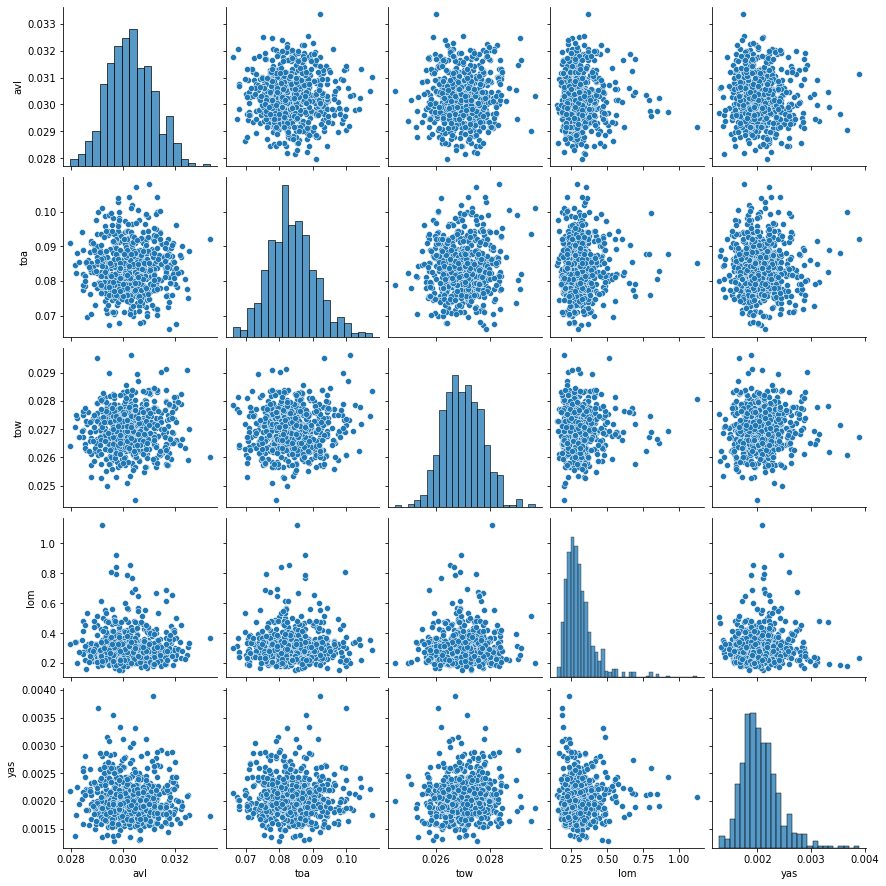

In [66]:
sns.pairplot(data1)

In [67]:
modelmul=smf.ols('yas~avl+toa+tow+lom',data=data1).fit()

In [68]:
modelmul.rsquared

0.009018494692864087

In [69]:
modelmul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    yas   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.406
Date:                Thu, 07 Apr 2022   Prob (F-statistic):              0.230
Time:                        13:47:11   Log-Likelihood:                 4075.3
No. Observations:                 623   AIC:                            -8141.
Df Residuals:                     618   BIC:                            -8118.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0018      0.001      2.480      0.013       0.000       0.003
avl           -0.0237      0.016     -1.472      0.142      -0.055       0.008
toa        -9.444e-05      0.002     -0.047      0.962      -0.004       0.004
tow            0.0377      0.019      1.934      0.054      -0.001       0.076
lom        -4.274e-06      0.000     -0.033      0.973      -0.000       0.000
==============================================================================
Omnibus:                      124.242   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.441
Skew:                           1.056   Prob(JB):                     2.83e-62
Kurtosis:                       5.541   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
modelmul.params

Intercept    0.001767
avl         -0.023748
toa         -0.000094
tow          0.037688
lom         -0.000004
dtype: float64

In [71]:
modelmul.tvalues,np.round(modelmul.pvalues,5)

(Intercept    2.479856
 avl         -1.471698
 toa         -0.047109
 tow          1.933985
 lom         -0.033495
 dtype: float64,
 Intercept    0.01341
 avl          0.14161
 toa          0.96244
 tow          0.05357
 lom          0.97329
 dtype: float64)

In [72]:
modelmul.rsquared,modelmul.rsquared_adj

(0.009018494692864087, 0.002604374917413499)

##### simple linear model

In [73]:
modeltoa=smf.ols('yas~toa',data=data1).fit()

In [74]:
modeltoa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    yas   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                  0.002122
Date:                Thu, 07 Apr 2022   Prob (F-statistic):              0.963
Time:                        13:47:12   Log-Likelihood:                 4072.5
No. Observations:                 623   AIC:                            -8141.
Df Residuals:                     621   BIC:                            -8132.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0020      0.000     12.131      0.000       0.002       0.002
toa         9.237e-05      0.002      0.046      0.963      -0.004       0.004
==============================================================================
Omnibus:                      122.792   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.281
Skew:                           1.058   Prob(JB):                     1.24e-59
Kurtosis:                       5.444   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
modellom=smf.ols('yas~lom',data=data1).fit()

In [76]:
modellom.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    yas   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.01082
Date:                Thu, 07 Apr 2022   Prob (F-statistic):              0.917
Time:                        13:47:13   Log-Likelihood:                 4072.5
No. Observations:                 623   AIC:                            -8141.
Df Residuals:                     621   BIC:                            -8132.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0021   4.21e-05     48.748      0.000       0.002       0.002
lom         1.327e-05      0.000      0.104      0.917      -0.000       0.000
==============================================================================
Omnibus:                      123.229   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.381
Skew:                           1.060   Prob(JB):                     4.33e-60
Kurtosis:                       5.458   Cond. No.                         9.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
modelall=smf.ols('yas~toa+lom',data=data1).fit()

In [78]:
modelall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    yas   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.006294
Date:                Thu, 07 Apr 2022   Prob (F-statistic):              0.994
Time:                        13:47:14   Log-Likelihood:                 4072.5
No. Observations:                 623   AIC:                            -8139.
Df Residuals:                     620   BIC:                            -8126.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0020      0.000     11.869      0.000       0.002       0.002
toa         8.489e-05      0.002      0.042      0.966      -0.004       0.004
lom         1.307e-05      0.000      0.102      0.919      -0.000       0.000
==============================================================================
Omnibus:                      123.117   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.822
Skew:                           1.059   Prob(JB):                     5.72e-60
Kurtosis:                       5.454   Cond. No.                         150.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### vif

In [79]:
data1.columns

Index(['avl', 'toa', 'tow', 'lom', 'yas'], dtype='object')

In [80]:
rs_avl=smf.ols('avl~toa+tow+lom',data=data1).fit().rsquared
vif_avl=1/(1-rs_avl)

rs_toa=smf.ols('toa~avl+tow+lom',data=data1).fit().rsquared
vif_toa=1/(1-rs_toa)

rs_tow=smf.ols('tow~avl+toa+lom',data=data1).fit().rsquared
vif_tow=1/(1-rs_tow)

rs_lom=smf.ols('lom~avl+toa+tow',data=data1).fit().rsquared
vif_lom=1/(1-rs_lom)

d1={'variables':['avl','toa','tow','lom'],'vif':[vif_avl,vif_toa,vif_tow,vif_lom]}
vif_frame=pd.DataFrame(d1)


In [81]:
vif_frame

,variables,vif
0,avl,1.004242
1,toa,1.003697
2,tow,1.007446
3,lom,1.004640


In [82]:
data1["yas"]-modelmul.predict(data1.iloc[:,[0,1,2,3]])

0     -0.000344
1      0.000095
2      0.000825
3     -0.000202
4     -0.000021
         ...   
618   -0.000250
619   -0.000110
620   -0.000396
621    0.000046
622    0.000504
Length: 623, dtype: float64

In [83]:
modelmul.resid

0     -0.000344
1      0.000095
2      0.000825
3     -0.000202
4     -0.000021
         ...   
618   -0.000250
619   -0.000110
620   -0.000396
621    0.000046
622    0.000504
Length: 623, dtype: float64

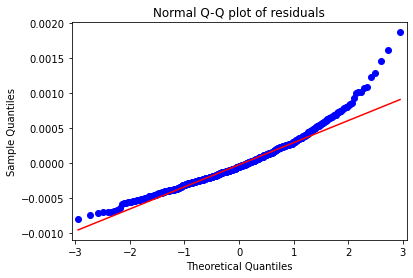

In [84]:
import statsmodels.api as sm
qqplot=sm.qqplot(modelmul.resid,line="q")
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [85]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

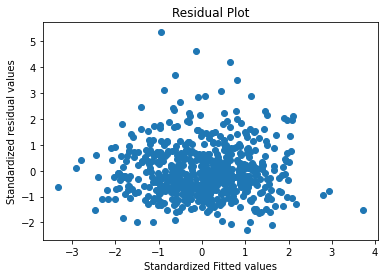

In [86]:
plt.scatter(get_standardized_values(modelmul.fittedvalues),
             get_standardized_values(modelmul.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [87]:
modelmul.fittedvalues

0      0.002080
1      0.002075
2      0.002034
3      0.002028
4      0.002074
         ...   
618    0.002037
619    0.002051
620    0.002058
621    0.002047
622    0.002059
Length: 623, dtype: float64

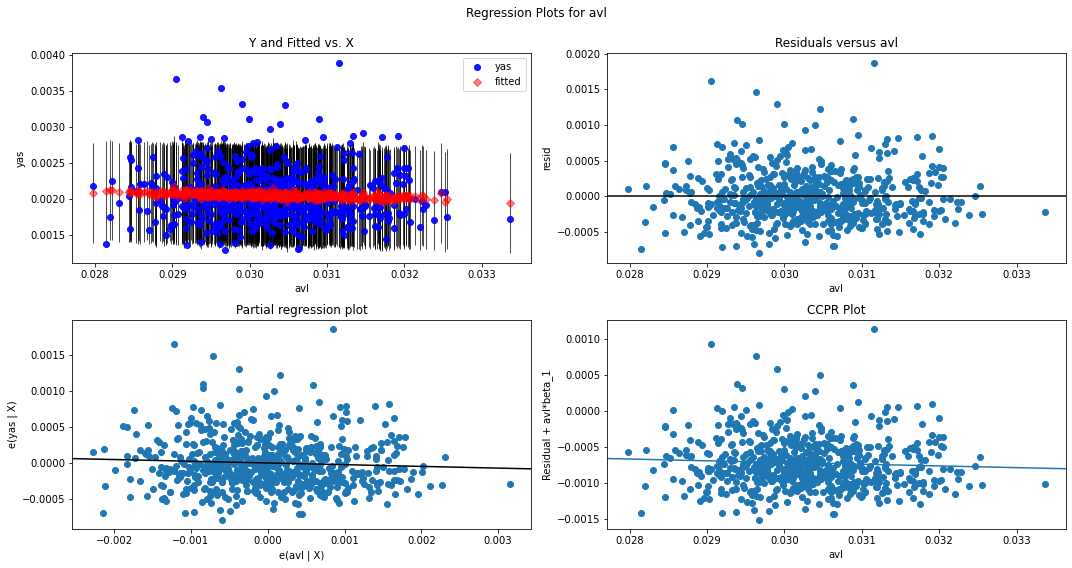

In [88]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(modelmul,"avl",fig=fig)



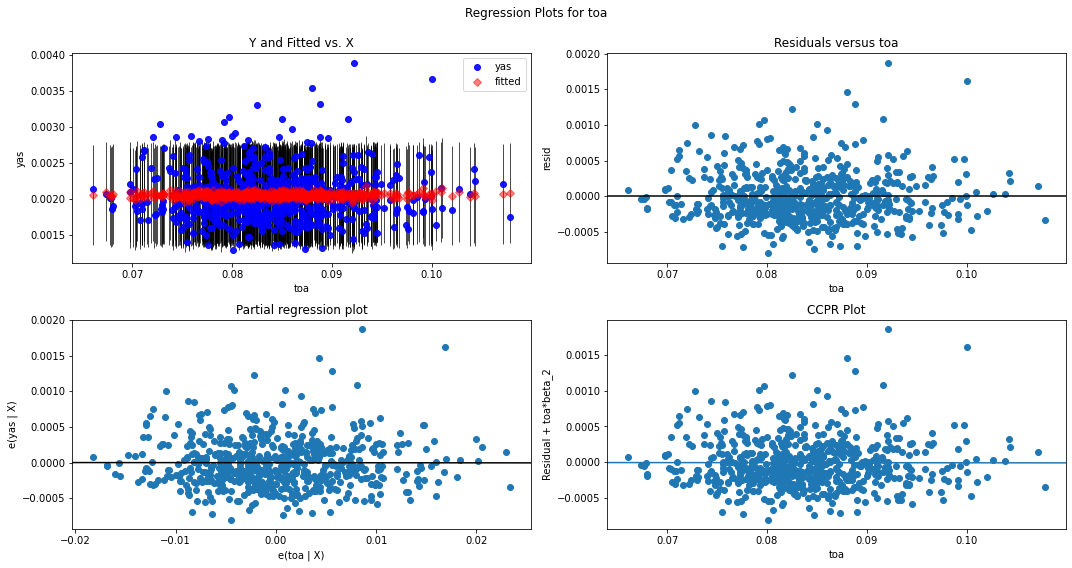

In [89]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(modelmul,"toa",fig=fig)


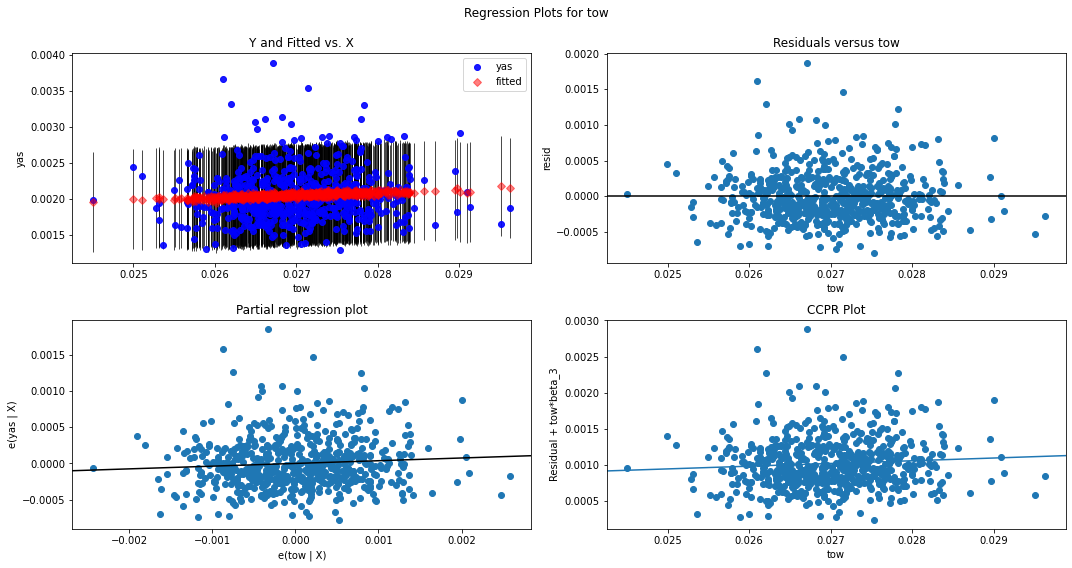

In [90]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(modelmul,"tow",fig=fig)



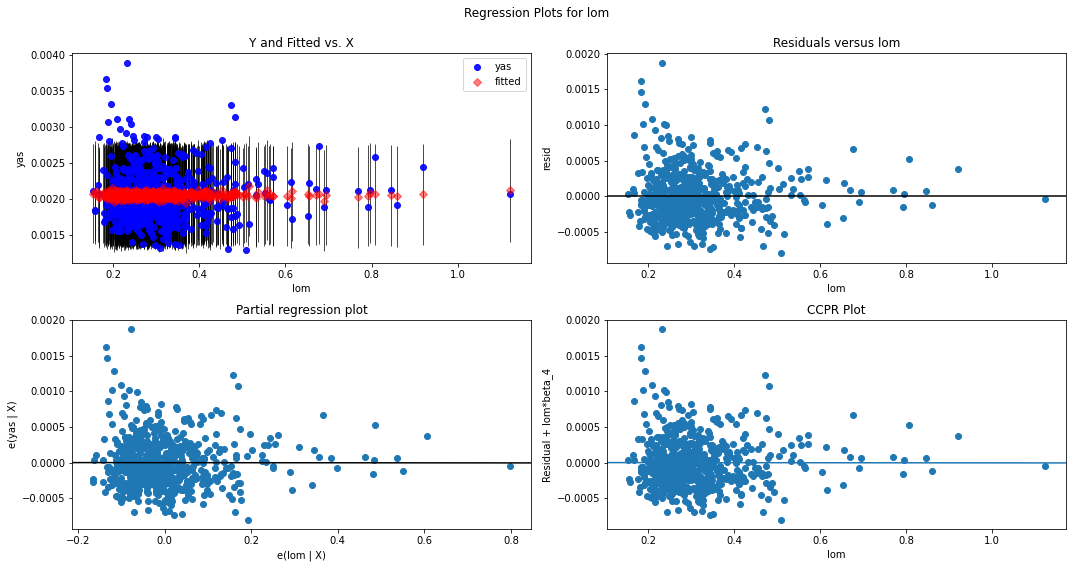

In [91]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(modelmul,"lom",fig=fig)


### model deletion diagnostics

In [92]:
model_influence = modelmul.get_influence()
(c, _) = model_influence.cooks_distance

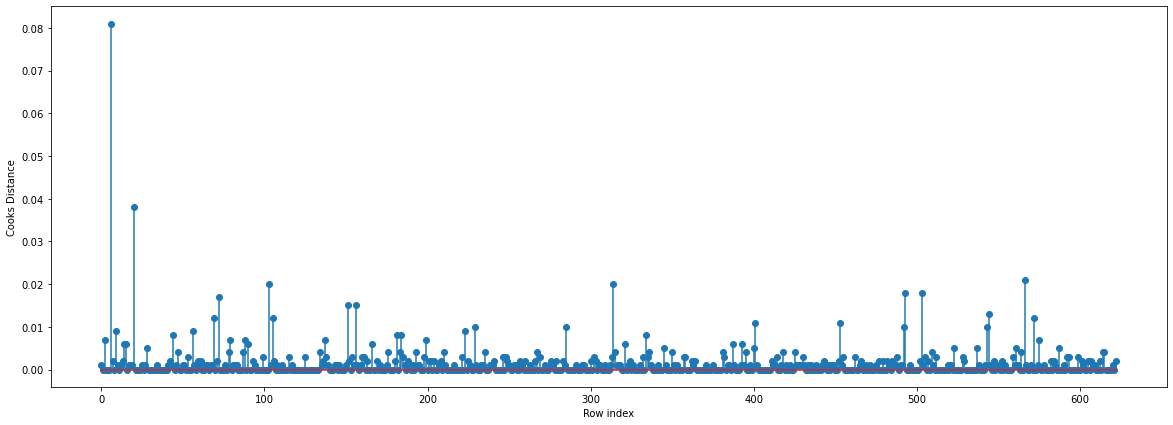

In [93]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [94]:
(np.argmax(c),np.max(c))

(6, 0.0814146355165306)

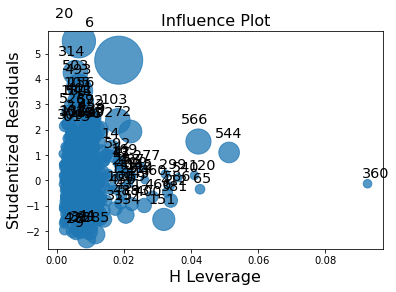

In [95]:
influence_plot(modelmul)
plt.show()

In [96]:
x=data1.iloc[:,:-1]
y=data1.iloc[:,-1:]

In [97]:
finalmodel=smf.ols('yas~avl+toa+tow+lom',data=data1).fit()

In [98]:
predy=finalmodel.predict(x)

In [99]:
finalmodel.rsquared

0.009018494692864087

In [100]:
metrics.mean_absolute_percentage_error(predy,y)

0.12892996221689582

In [101]:
metrics.mean_absolute_error(predy,y)

0.0002651416604267122